In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
df = pd.read_csv("merc.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [3]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [4]:
# Исходя из данных налог на машину рассчиывается из л.с., следовательно прямо зависит от объема двигателя.
# Данные по налогу - неккоректны, значит ибираем данный столбец

df = df[["model", "year", "price", "transmission", "mileage", "fuelType", "mpg", "engineSize"]]
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,30.1,4.0
...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,45.6,2.0


In [5]:
for model in df["model"].unique():
	df = df.replace(model, " ".join(model.split()))

In [6]:
df["model"].unique()

array(['SLK', 'S Class', 'SL CLASS', 'G Class', 'GLE Class', 'GLA Class',
       'A Class', 'B Class', 'GLC Class', 'C Class', 'E Class',
       'GL Class', 'CLS Class', 'CLC Class', 'CLA Class', 'V Class',
       'M Class', 'CL Class', 'GLS Class', 'GLB Class', 'X-CLASS', '180',
       'CLK', 'R Class', '230', '220', '200'], dtype=object)

In [7]:
raiting_models = open("raiting_model.txt", encoding="utf-8").read().split("\n")

dict_raiting_models = {}
for raiting_model in raiting_models:
	model, raiting = raiting_model.split(" - ")
	dict_raiting_models[model] = int(raiting)

dict_raiting_models

{'180': 1,
 '200': 2,
 '220': 3,
 '230': 4,
 'A Class': 5,
 'B Class': 6,
 'C Class': 7,
 'CLA Class': 8,
 'CLC Class': 9,
 'CLK': 10,
 'CLS Class': 11,
 'E Class': 12,
 'G Class': 13,
 'GLA Class': 14,
 'GLB Class': 15,
 'GLC Class': 16,
 'GLE Class': 17,
 'GLS Class': 18,
 'M Class': 19,
 'R Class': 20,
 'S Class': 21,
 'SL CLASS': 22,
 'SLK': 23,
 'V Class': 24,
 'X-CLASS': 25,
 'CL Class': 26,
 'GL Class': 27}

In [8]:
df = df.replace(
	{
		"model": dict_raiting_models
	}
)

C:\Users\ebeck\AppData\Local\Temp\ipykernel_3956\1937908228.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(


In [9]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,23,2005,5200,Automatic,63000,Petrol,32.1,1.8
1,21,2017,34948,Automatic,27000,Hybrid,61.4,2.1
2,22,2016,49948,Automatic,6200,Petrol,28.0,5.5
3,13,2016,61948,Automatic,16000,Petrol,30.4,4.0
4,13,2016,73948,Automatic,4000,Petrol,30.1,4.0
...,...,...,...,...,...,...,...,...
13114,7,2020,35999,Automatic,500,Diesel,55.4,2.0
13115,6,2020,24699,Automatic,2500,Diesel,55.4,2.0
13116,16,2019,30999,Automatic,11612,Diesel,41.5,2.1
13117,11,2019,37990,Automatic,2426,Diesel,45.6,2.0


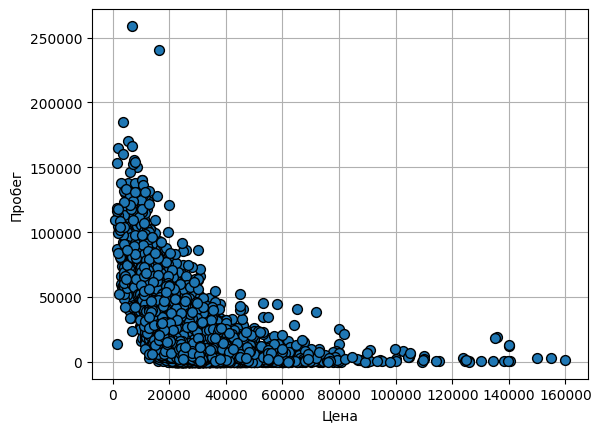

In [10]:
plt.scatter(df["price"], df["mileage"], ec="k", s=50, zorder=3)

plt.xlabel("Цена")
plt.ylabel("Пробег")

plt.grid()
plt.show()

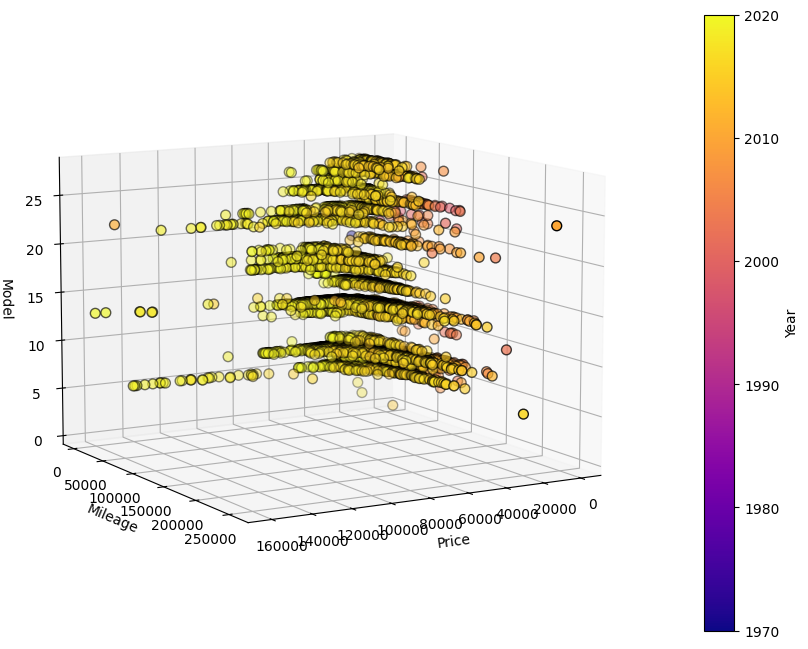

In [11]:
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw={"projection": "3d"})

scatter = ax.scatter(
	df["price"], 
	df["mileage"],
	df["model"],
	s=50,
	c=df["year"], 
	ec="k",
	cmap="plasma",
	zorder=3
)

ax.view_init(
	elev=10,
	azim=60,
)

ax.set_xlabel("Price")
ax.set_ylabel("Mileage")
ax.set_zlabel("Model")

fig.colorbar(scatter, ax=ax, label="Year")

plt.show()

In [12]:
raiting_transmissions = open("raiting_transmission.txt", encoding="utf-8").read().split("\n")

dict_raiting_transmissions = {}
for raiting_transmission in raiting_transmissions:
	transmission, raiting = raiting_transmission.split(" - ")
	dict_raiting_transmissions[transmission] = int(raiting)

dict_raiting_transmissions

{'Automatic': 4, 'Semi-Auto': 3, 'Manual': 2, 'Other': 1}

In [13]:
df = df.replace(
	{
		"transmission": dict_raiting_transmissions
	}
)

C:\Users\ebeck\AppData\Local\Temp\ipykernel_3956\538603816.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(


In [14]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,23,2005,5200,4,63000,Petrol,32.1,1.8
1,21,2017,34948,4,27000,Hybrid,61.4,2.1
2,22,2016,49948,4,6200,Petrol,28.0,5.5
3,13,2016,61948,4,16000,Petrol,30.4,4.0
4,13,2016,73948,4,4000,Petrol,30.1,4.0
...,...,...,...,...,...,...,...,...
13114,7,2020,35999,4,500,Diesel,55.4,2.0
13115,6,2020,24699,4,2500,Diesel,55.4,2.0
13116,16,2019,30999,4,11612,Diesel,41.5,2.1
13117,11,2019,37990,4,2426,Diesel,45.6,2.0


In [15]:
raiting_fueltypes = open("raiting_fueltype.txt", encoding="utf-8").read().split("\n")

dict_raiting_fueltypes = {}
for raiting_fueltype in raiting_fueltypes:
	fueltype, raiting = raiting_fueltype.split(" - ")
	dict_raiting_fueltypes[fueltype] = int(raiting)

dict_raiting_fueltypes

{'Hybrid': 4, 'Petrol': 3, 'Diesel': 2, 'Other': 1}

In [16]:
df = df.replace(
	{
		"fuelType": dict_raiting_fueltypes
	}
)

C:\Users\ebeck\AppData\Local\Temp\ipykernel_3956\1494207270.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(


In [17]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,23,2005,5200,4,63000,3,32.1,1.8
1,21,2017,34948,4,27000,4,61.4,2.1
2,22,2016,49948,4,6200,3,28.0,5.5
3,13,2016,61948,4,16000,3,30.4,4.0
4,13,2016,73948,4,4000,3,30.1,4.0
...,...,...,...,...,...,...,...,...
13114,7,2020,35999,4,500,2,55.4,2.0
13115,6,2020,24699,4,2500,2,55.4,2.0
13116,16,2019,30999,4,11612,2,41.5,2.1
13117,11,2019,37990,4,2426,2,45.6,2.0


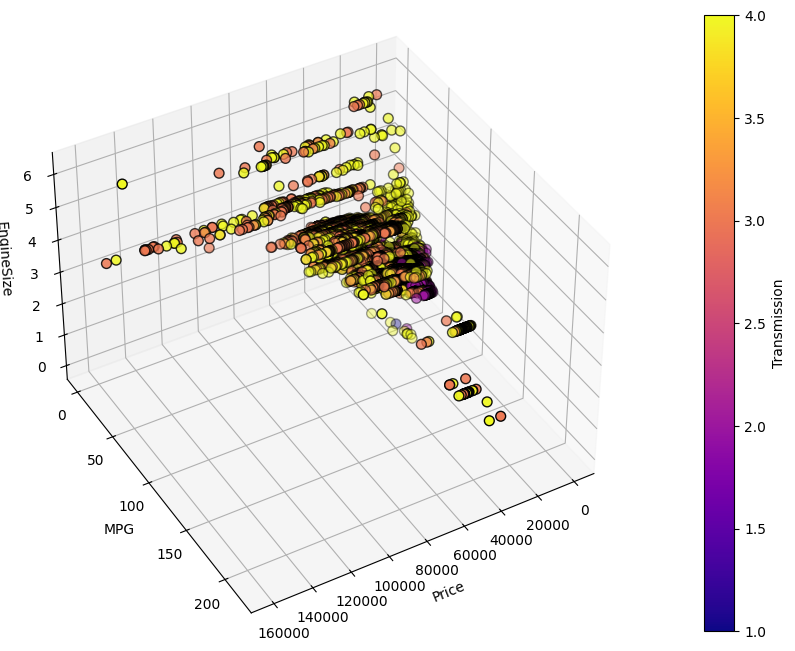

In [18]:
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw={"projection": "3d"})

scatter = ax.scatter(
	df["price"], 
	df["mpg"],
	df["engineSize"],
	s=50,
	c=df["transmission"], 
	ec="k",
	cmap="plasma",
	zorder=3
)

ax.view_init(
	elev=40,
	azim=60,
)

ax.set_xlabel("Price")
ax.set_ylabel("MPG")
ax.set_zlabel("EngineSize")

fig.colorbar(scatter, ax=ax, label="Transmission")

plt.show()

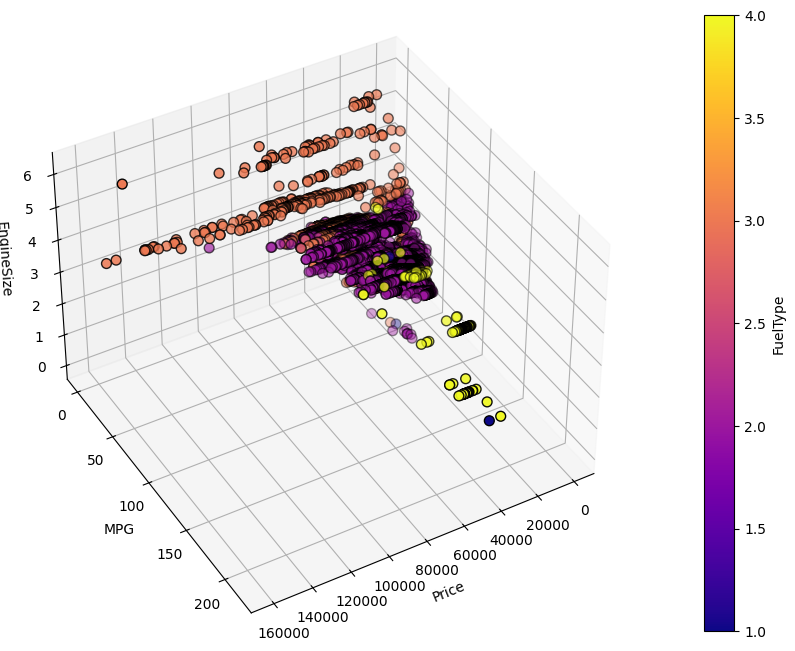

In [19]:
fig, ax = plt.subplots(figsize=(20, 8), subplot_kw={"projection": "3d"})

scatter = ax.scatter(
	df["price"], 
	df["mpg"],
	df["engineSize"],
	s=50,
	c=df["fuelType"], 
	ec="k",
	cmap="plasma",
	zorder=3
)

ax.view_init(
	elev=40,
	azim=60,
)

ax.set_xlabel("Price")
ax.set_ylabel("MPG")
ax.set_zlabel("EngineSize")

fig.colorbar(scatter, ax=ax, label="FuelType")

plt.show()

In [20]:
x, y = df[["model", "year", "transmission", "mileage", "fuelType", "mpg", "engineSize"]], df["price"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(
	x,
	y,
	train_size=.2,
	random_state=42
)

In [22]:
dict_metrics = {
	"MSE": [],
	"MAE": [],
	"R2": [],
}

In [23]:
LinearRegression_model = LinearRegression().fit(x, y)

coef = LinearRegression_model.coef_
f_y = LinearRegression_model.intercept_
for i in range(7):
	x_ = sp.symbols(f"x_{i}")
	f_y += x_ * coef[i]

y_pred = LinearRegression_model.predict(x)
MSE = mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)
R2 = r2_score(y, y_pred)
print(
	f"MSE: {MSE}",
	f"MAE: {MAE}",
	f"R^2: {R2}",
	f_y,
	sep="\n"
)

dict_metrics["MSE"] += [MSE]
dict_metrics["MAE"] += [MAE]
dict_metrics["R2"] += [R2]

MSE: 42481816.55414731
MAE: 4001.3990437481766
R^2: 0.6970740190807228
136.611912354042*x_0 + 2190.18962443764*x_1 + 634.36242713193*x_2 - 0.127005170771554*x_3 + 1927.42098500278*x_4 - 108.479188966046*x_5 + 10625.6200305947*x_6 - 4414819.05901908


In [24]:
LinearRegression_model2 = LinearRegression().fit(x_train, y_train)

coef = LinearRegression_model2.coef_
f_y = LinearRegression_model2.intercept_
for i in range(7):
	x_ = sp.symbols(f"x_{i}")
	f_y += x_ * coef[i]

y_pred = LinearRegression_model2.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(
	f"MSE: {MSE}",
	f"MAE: {MAE}",
	f"R^2: {R2}",
	f_y,
	sep="\n"
)

dict_metrics["MSE"] += [MSE]
dict_metrics["MAE"] += [MAE]
dict_metrics["R2"] += [R2]

MSE: 43960898.63974204
MAE: 4070.0243080633504
R^2: 0.6887843180906732
180.336144245354*x_0 + 1569.78681417331*x_1 + 822.961594433968*x_2 - 0.156570974438864*x_3 + 1415.15193946663*x_4 - 143.054160916929*x_5 + 9266.38269331785*x_6 - 3157709.34979883


In [25]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly)

MSE = mean_squared_error(y_test, y_pred_poly)
MAE = mean_absolute_error(y_test, y_pred_poly)
R2 = r2_score(y_test, y_pred_poly)
print(
	f"MSE: {MSE}",
	f"MAE: {MAE}",
	f"R^2: {R2}",
	sep="\n"
)

dict_metrics["MSE"] += [MSE]
dict_metrics["MAE"] += [MAE]
dict_metrics["R2"] += [R2]

MSE: 28164046.511209093
MAE: 3141.849569277787
R^2: 0.8006161563679225


In [26]:
Lasso_model = Lasso(.4).fit(x_train, y_train)

coef = Lasso_model.coef_
f_y = Lasso_model.intercept_
for i in range(7):
	x_ = sp.symbols(f"x_{i}")
	f_y += x_ * coef[i]

y_pred = Lasso_model.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(
	f"MSE: {MSE}",
	f"MAE: {MAE}",
	f"R^2: {R2}",
	f_y,
	sep="\n"
)

dict_metrics["MSE"] += [MSE]
dict_metrics["MAE"] += [MAE]
dict_metrics["R2"] += [R2]

MSE: 43962794.558480665
MAE: 4069.978074525336
R^2: 0.688770896171164
180.334255723808*x_0 + 1569.60533887882*x_1 + 822.058389864977*x_2 - 0.156582328347202*x_3 + 1413.14177246807*x_4 - 143.08891758869*x_5 + 9264.96261229511*x_6 - 3157330.52986226


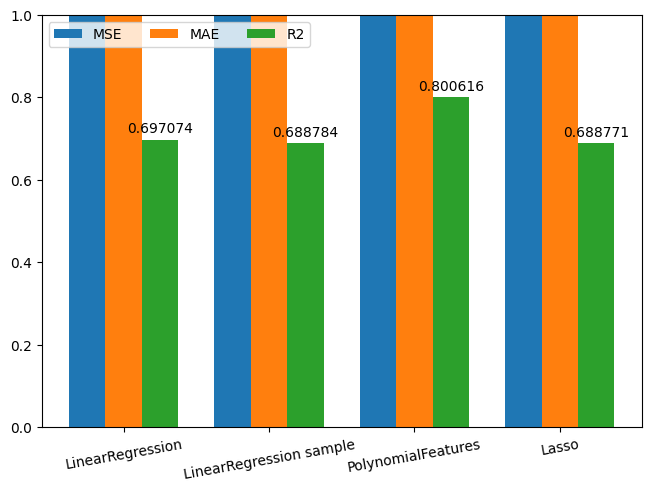

In [27]:
fig, ax = plt.subplots(layout="constrained")

species = ["LinearRegression", "LinearRegression sample", "PolynomialFeatures", "Lasso"]

x = np.arange(len(species))
width = 0.25
multiplier = 0

for k, v in dict_metrics.items():
	offset = width * multiplier
	rects = ax.bar(x + offset, v, width, label=k)
	ax.bar_label(rects, padding=3)
	multiplier += 1

ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.tick_params(axis="x", rotation=10)
plt.show()

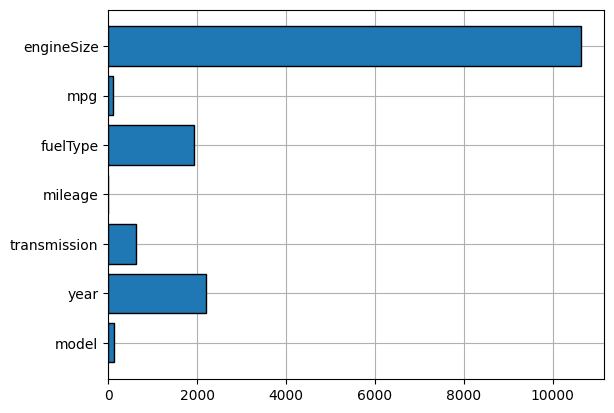

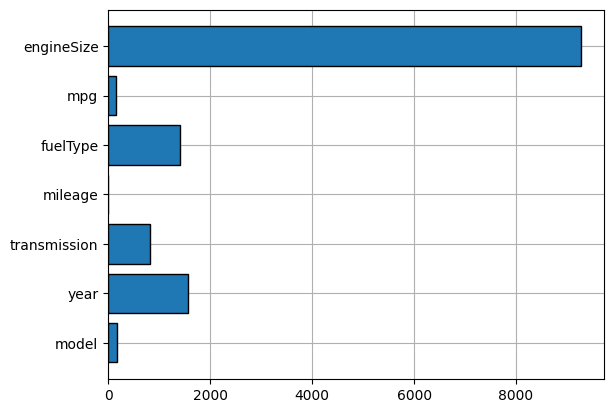

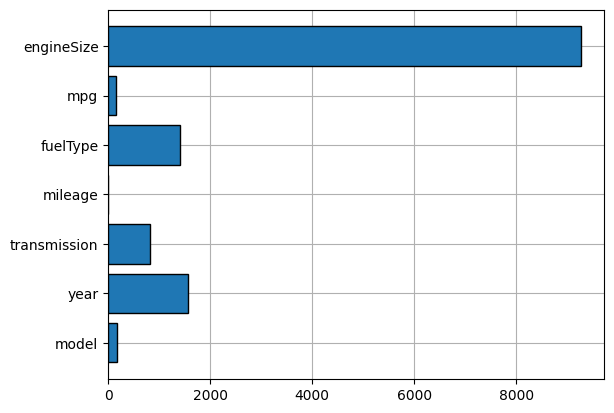

In [28]:
models = [
	LinearRegression_model,
	LinearRegression_model2,
	Lasso_model
]

cols = ["model", "year", "transmission", "mileage", "fuelType", "mpg", "engineSize"]

for model in models:
	plt.barh(cols, abs(model.coef_), ec="k", zorder=3)
	plt.grid()
	plt.show()

In [29]:
dict_ridge_metrics = {
	"MSE": [],
	"MAE": [],
	"R2": [],
}
solvers = ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]

for solver in solvers:
	Ridge_model = Ridge(.4, solver=solver, max_iter=10000).fit(x_train, y_train)

	coef = Ridge_model.coef_
	f_y = Ridge_model.intercept_
	for i in range(7):
		x_ = sp.symbols(f"x_{i}")
		f_y += x_ * coef[i]

	y_pred = Ridge_model.predict(x_test)
	MSE = mean_squared_error(y_test, y_pred)
	MAE = mean_absolute_error(y_test, y_pred)
	R2 = r2_score(y_test, y_pred)
	print(
		f"Solver - {solver}",
		f"MSE: {MSE}",
		f"MAE: {MAE}",
		f"R^2: {R2}",
		f_y,
		sep="\n"
	)
	print("-" * 300)

	dict_ridge_metrics["MSE"] += [MSE]
	dict_ridge_metrics["MAE"] += [MAE]
	dict_ridge_metrics["R2"] += [R2]

Solver - svd
MSE: 43965646.254461184
MAE: 4070.049028664582
R^2: 0.6887507079462498
180.44207578452*x_0 + 1569.60424136866*x_1 + 823.280259805349*x_2 - 0.156570455162768*x_3 + 1413.71193181427*x_4 - 143.128287443386*x_5 + 9261.0134060261*x_6 - 3157324.7735012
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Solver - cholesky
MSE: 43965646.25447183
MAE: 4070.0490286646045
R^2: 0.6887507079461743
180.442075784507*x_0 + 1569.60424136762*x_1 + 823.280259805418*x_2 - 0.156570455162389*x_3 + 1413.71193181427*x_4 - 143.128287443386*x_5 + 9261.01340602611*x_6 - 3157324.77349913
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

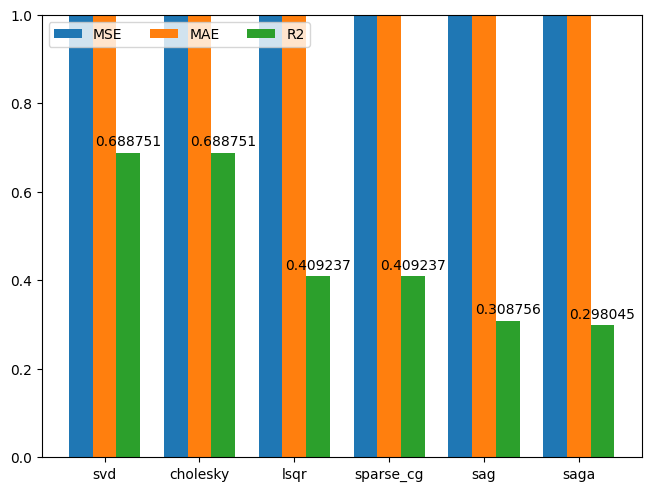

In [30]:
fig, ax = plt.subplots(layout="constrained")

species = ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]

x = np.arange(len(species))
width = 0.25
multiplier = 0

for k, v in dict_ridge_metrics.items():
	offset = width * multiplier
	rects = ax.bar(x + offset, v, width, label=k)
	ax.bar_label(rects, padding=3)
	multiplier += 1

ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

In [31]:
accuracys = []

In [32]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

scaler_minmax = MinMaxScaler()
x_train_minmax = scaler_minmax.fit_transform(x_train_scaled)
x_test_minmax = scaler_minmax.transform(x_test_scaled)

LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train_minmax, y_train)

y_pred = LogisticRegression_model.predict(x_test_minmax)
accuracy = accuracy_score(y_test, y_pred)
CM = confusion_matrix(y_test, y_pred)

print(
	f"accuracy: {accuracy}",
	f"CM: {CM}",
	sep="\n"
)

accuracys += [accuracy]

c:\Users\ebeck\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")


accuracy: 0.006192835365853659
CM: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_poly)
x_test_scaled = scaler.transform(x_test_poly)

scaler_minmax = MinMaxScaler()
x_train_minmax = scaler_minmax.fit_transform(x_train_scaled)
x_test_minmax = scaler_minmax.transform(x_test_scaled)

LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train_minmax, y_train)

y_pred = LogisticRegression_model.predict(x_test_minmax)
accuracy = accuracy_score(y_test, y_pred)
CM = confusion_matrix(y_test, y_pred)

print(
	f"accuracy: {accuracy}",
	f"CM: {CM}",
	sep="\n"
)

accuracys += [accuracy]

c:\Users\ebeck\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")


accuracy: 0.009336890243902439
CM: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


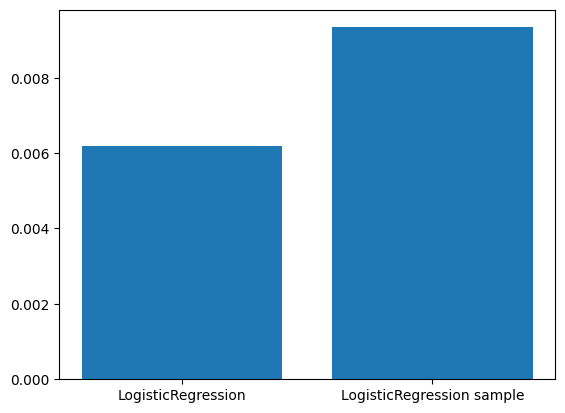

In [34]:
fig, ax = plt.subplots()

models = ["LogisticRegression", "LogisticRegression sample"]
ax.bar(models, accuracys)

plt.show()

In [ ]:
# Если посмотреть на все выбранные метрири:
# 	1. Для текущих данных подходят модели линейной регрессии. У логических очень плохие показатели.
# 	2. Самая качественная модель - Полиномиальная. Если применить ко мне др. моделям, то будет значительный прирост.
# 	3. В модели регрессии l2 оказалось так, что методы оптимизации, которые заключаются в том, чтобы уменьшить кол-во
# 		данных, но не потерять их свойства - являются более эффективными
#	4. Выявленно, что влияет объем двигателя